# Fisher's Linear Discriminant Analysis

We perform discriminant analys on data with categorical dependent variables and continuous and continuous independent variables. The first part labels generated data from two distributions with different means and covariance matrices; the second part classfies data from the Ionosphere Dataset.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# to generate perpendicular line to centroids
import utils

# to load MATLAB .mat files
from scipy.io import loadmat

# to calculate square root of matrix
from scipy.linalg import sqrtm

To load *.mat* files we use the function <code>loadmat</code> from <code>scipy.io</code>. This functions returns a dictionary; the key <code>'sonar_data'</code> gives the array with data, the key <code>sonar_labels</code> the corresponding labels.

In [16]:
# path to sonar dataset
path = 'data/sonar.mat'
data = loadmat(path)

# extract features and labels
sonar_data = data['sonar_data']
sonar_labels = data['sonar_label']
print(sonar_data.shape, '\n',
      sonar_labels.shape)

(208, 60) 
 (208, 1)


## Fisher's LDA with generated data

We generate 40 observations from a normal distribution with mean

$$
\mu_A = \begin{pmatrix} -8 & 5 \end{pmatrix}
$$

and covariance matrix

$$
\Sigma_A =
\begin{pmatrix}
2.5 & -1.5 \\
-1.5 & 2.5
\end{pmatrix}
$$

and 60 observations from a normal distribution with mean

$$
\mu_B = \begin{pmatrix} -3 & 8 \end{pmatrix}
$$

and covariance matrix

$$
\Sigma_B =
\begin{pmatrix}
2.5 & -1.5 \\
-1.5 & 2.5
\end{pmatrix}.
$$

The generated data is the split into two training datasets and two test datasets.

In [183]:
theta = np.pi / 4

# mean vectors
muA, muB = np.array([-8, 5]), np.array([-3, 8])

T = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta), np.cos(theta)]])
S = T @ np.diag([1,2]) @ T.T

# generate data
DataA = (np.random.randn(40, 2) @ S) + muA
DataB = (np.random.randn(60, 2) @ S) + muB

# train-test split
TrainA = DataA[:-20]
TrainB = DataB[:-20]
TestA = DataA[-20:]
TestB = DataB[-20:]

Below is a plot of the traing data from the two classes.

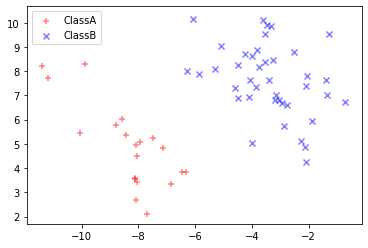

In [184]:
for data, marker, color, label in zip((TrainA, TrainB), 
    ('+', 'x'), ('red', 'blue'), ('ClassA', 'ClassB')):

    plt.scatter(*data.T,
            marker=marker,
            color=color,
            alpha=0.5,
            label=label
            )
    plt.legend()
plt.show()

Fisher's linear discriminant aims to project each data point ont a lower diminsion - in our case from two-dimensional space to one-dimensional space in a direction that maximally separates the points from different classes.

In the case of two classes, one does so by maximizing the fraction

$$
\frac{\mathrm{(w^Tm_A - w^Tm_B)^2}}{\mathrm{w^T(\Sigma_A + \Sigma_B)w}},
$$

where $\mathrm{m_i}$ is the mean vector of the $i$:th class and ${\Sigma_i}$ is the covariance matrix of the $i$:th class.

### Derivation of the optimal solution

The optimal solution is given by
$$
\mathrm{w} = \left(\mathrm{\Sigma_A - \Sigma_B}\right)^{-1} \left(\mathrm{m_A - m_B} \right).
$$

To see this, note first that the numerator may be written in the form

$$
\mathrm{w^T S_B w},
$$

where $\mathrm{S_B}$ is the matrix

$$
\mathrm{(m_A - m_B)(m_A - m_B)^T},
$$

since 

$$
\begin{align*}
\mathrm{(w^Tm_A - w^Tm_B)^2} &= \mathrm{(w^Tm_A - w^Tm_B)(m_A^Tw - m_B^T w)} \\
&= \mathrm{w^T(m_A - m_B)(m_A - m_B)^T w}.
\end{align*}
$$

Note also that

$$
\mathrm{w^T S_B w} = \mathrm{(w^Tm_A - w^Tm_B)^2}
$$

means that $\mathrm{S_b}$ is positive definite.

We proved in the first homework that, under the condition that $\mathrm{S_B}$ is positive definite, then the maximum value of 

$$
\frac{\mathrm{x^T S_B x} }{\mathrm{x^T x}}
$$

is given by be larges eigenvalue $\lambda$ of $\mathrm{S_B}$.

Now assume that the covariance matrices $\mathrm{\Sigma_A}$ and $\mathrm{\Sigma_B}$ are positive definite (this is for instance the case when they are covariance matrices of the normal distribution - but not necessarily so when they are *sample* covariance matrices). Then the sum

$$
\mathrm{S_W} := \mathrm{\Sigma_A} + \mathrm{\Sigma_B}
$$

is also positive definite and has an invertible (symmetric) square root $\mathrm{S_W^{1/2}}$.

Thus

$$
\begin{align*}
\frac{\mathrm{w^T S_B w} }{\mathrm{w^T(\Sigma_A + \Sigma_B)w}} &= \frac{\mathrm{(S_W^{1/2}w)^T S_W^{-1/2}S_BS_W^{-1/2}(S_W^{1/2} w)} }{\mathrm{(S_W^{1/2}w)^T(S_W^{1/2}w)}} \\
&= \frac{\mathrm{y^T S_W^{-1/2}S_BS_W^{-1/2}y} }{\mathrm{y^Ty}}.
\end{align*}
$$

As $\mathrm{S_W^{1/2}}$ is symmetric, $\mathrm{S_W^{-1/2}S_BS_W^{-1/2}}$ is positive definite and the maximum value of 

$$
\frac{\mathrm{w^T S_B w} }{\mathrm{w^T(\Sigma_A + \Sigma_B)w}} 
$$

is thus given by the larges eigenvalue of

$$
\mathrm{S_W^{-1/2}S_BS_W^{-1/2}}.
$$

Assuming that $\mathrm{S_B}$ and $\mathrm{S_W^{-1/2}}$ commutes the maximum is given by the larges eigenvalue of

$$
\mathrm{S_W^{-1}S_B}.
$$

Now, calculating the partial derivatives of 

$$
\mathrm{w^T S_B w}
$$

and 

$$
\mathrm{w^TS_Ww}
$$

we find that their respecitve gradients are given by

$$
\mathrm{2 S_B w} \text{ and } \mathrm{2 S_W w}.
$$

Using the quotient rule we find the the gradient of

$$
\frac{\mathrm{w^T S_B w}}{\mathrm{w^TS_Ww}}
$$

is given by

$$
\frac{ \mathrm{(2 S_B w)w^TS_Ww - (2 S_Ww) w^T S_B w} }{(\mathrm{w^TS_Ww})^2}.
$$

Setting

$$
\frac{ \mathrm{(2 S_B w)w^TS_Ww - (2 S_Ww) w^T S_B w} }{(\mathrm{w^TS_Ww})^2} = \boldsymbol 0
$$

and solving for $\mathrm w$ and assuming $\mathrm{S_w}$ is invertible, we find that

$$
\begin{align*}
\mathrm w &= \frac{\mathrm{w^T S_w w}}{\mathrm{w^T S_B w}}\mathrm{S_w^{-1}S_B w} \\
&= \frac{\mathrm{w^T S_w w}}{\mathrm{w^T S_B w}}\mathrm{S_w^{-1}}\mathrm{(m_A - m_B)(m_A - m_B)^T w} \\
&= \left (  \frac{\mathrm{w^T S_w w}}{\mathrm{w^T S_B w}}\mathrm{(m_A - m_B)^T w} \right)\mathrm{S_w^{-1}}\mathrm{(m_A - m_B)}.
\end{align*}
$$

Which is what we set out to find (plus a scaling factor which does not change the direction of the vector). Assuming the correctness of the previous maximum as that of the largest eigenvalue, this must indeed be a maximum as it solves the generalized eigenvalue problem.

### Projecting the data onto a line

Let us now project the training data onto the vector $\mathrm w$ found above and observe the separation it accomplish.

In [185]:
mA = np.mean(TrainA, axis=0)
mB = np.mean(TrainB, axis=0)
sA = np.cov(TrainA.T)
sB = np.cov(TrainB.T)
S_W = sA + sB

In [191]:
# separation vector
w = np.linalg.inv(S_W) @ (mA - mB)
# normalize w
w = w / np.linalg.norm(w)

The formula for projecting a vector $\mathrm v$ onto an other (normalized) vector $\mathrm w$ is

$$
\langle \mathrm v, \mathrm w \rangle \mathrm w.
$$

In NumPy, given an array of vectors <code>Data</code> we may calculate the inner product of each vector with the vector <code>w</code> using matrix multiplication <code>w.T @ Data.T</code>. Using the broadcasting capabilities of NumPy, it is then possible to multiply each coordinate of  <code>w</code> with each resulting inner product from this matrix multiplication with
<code>(w.T @ Data.T)[:, None] * w</code>. This results in an array with all the projected vectors.

In [192]:
projA = (w.T @ TrainA.T)[:, None] * w
projB = (w.T @ TrainB.T)[:, None] * w

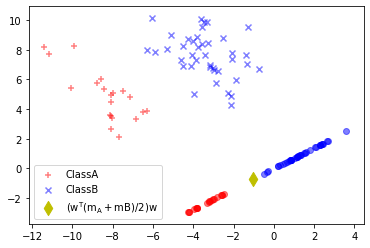

In [193]:
# plot data
for data, marker, color, label in zip((TrainA, TrainB), 
    ('+', 'x'), ('red', 'blue'), ('ClassA', 'ClassB')):

    plt.scatter(*data.T,
            marker=marker,
            color=color,
            alpha=0.5,
            label=label
            )
    
# plot projected data
for data, marker, color in zip((projA, projB), 
    ('o', 'o'), ('red', 'blue')):

    plt.scatter(*data.T,
            marker=marker,
            color=color,
            alpha=0.5,
            )

# plot decision boundary
w_c = (w @ (mA + mB) / 2) * w
plt.scatter(*w_c, s=100, c='y', marker='d', 
            label='$\mathrm{(w^T(m_A + mB)/2)w}$')

plt.legend()
plt.show()

This looks like a pretty good separation of the two classes!

### Building a classifier from Fisher's linear discriminant

We may build a classifier that classifies any vector $\mathrm x$ as belonging to either class A or class B, depending on wether it is projected to some number greater or less than some specified number $c$. The mean from the training data <code>TrainA</code> is projected to the point $\mathrm{w^T m_A}$ and the mean of the training data <code>trainB</code> is projected to the point $\mathrm{w^T m_B}$, we thus let $c$ be the middle point between these to values, that is

$$
c := \mathrm{w^T (m_A + m_B) / 2}.
$$

A vector $\mathrm x$ is then classified as belongin to class A if $\mathrm{w^T x } \ge c$ and as belonging to class B if $\mathrm{w^T x} < c$.

In [194]:
def fda_classifier(data, w, meanA, meanB):
    '''
    Classifies row each row x in the array data as either
    belonging to class A or class B. Calculates w^T * meanA and
    w^T * meanB; and if w^T * meanA > w^T * meanB then x is
    classified as belonging to class A if w^T * x is greater 
    than w^T * (meanA + meanB) / 2, or as belonging to class B 
    otherwise.
    
    Parameters
    ----------
    data : array
        Data to be classified. Should be of shape (n, 2).
        
    w : array
        The vector which projects each row in Data onto the
        real line. Should be of shape (2, )
    
    meanA : array
        Mean vector of class A
            
    meanB : array
        Mean vector of class B
            
    Returns
    -------
    labels : array_like
        The array with the labels for each row in data. The 
        label for class a is 1 and the label for class B is 0.
    
    '''
    # calculate decision boundary
    c = w @ (meanA + meanB) / 2
    
    #project data
    projections = w @ data.T
    
    # determine labels
    labels = (projections > c) * 1
    
    # reverse labels if the projection of meanB is greatest
    if w @ meanA < w @ meanB:
        labels = np.ones(labels.shape) - labels
    
    return labels
    
    

### How accurate is the classifier?

Looking at the plot above, it seems like we could get an almost perfect classification. Let us try to classify the *test data* and record the accuracy. The accuracy we calculate is the rate of missclassified observations from either of the two classes.

In [195]:
# classify test data
train_labels_A = fda_classifier(TrainA, w, mA, mB)
train_labels_B = fda_classifier(TrainB, w, mA, mB)

# sum missclassifications
misscls = np.sum(train_labels_A == 0) + np.sum(train_labels_B == 1)

# calculate success rate
success_rate = 1 - (misscls / (len(TrainA) + len(TrainB)))
print('Success rate: ', success_rate)

Success rate:  1.0


## Fisher's LDA on the Ionosphere Dataset

We will now apply Fisher's linear discriminant on the Ionosphere Dataset from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Ionosphere). The dataset contains $208$ labeled observations - the labels are $0$ or $1$ - where each observation has $60$ features. 

In this case, with $34$ features, it isn't necessary to project each observation to a real number, but one could instead try to project the dataset to sume $d$-dimensional space, with $d < 34$ and then classify  the observations based on some decision boundary in $\mathbb R^d$. But we will begin with to project the data onto $\mathbb R$ and se how the classifier fares.

We will identify the label $1$ as label $A$ and label $0$ as label $B$.

We make a $70$-$30$ train-test split of the data by first shuffling the dataset and then splitting each label into a train - and a test - part.

In [51]:
sonar_labels = sonar_labels.flatten()

# generate random index
indx = np.arange(sonar_labels.shape[0])
np.random.shuffle(indx)

# reindex data
sonar_data = sonar_data[indx]
sonar_labels = sonar_labels[indx]

# extract data with labels
sonarA = sonar_data[sonar_labels == 1]
sonarB = sonar_data[sonar_labels == 0]

# number of observations for testing
nA = np.floor(0.3 * len(sonarA)).astype(int)
nB = np.floor(0.3 * len(sonarB)).astype(int)

# train-test split
sonarTrainA = sonarA[:-nA]
sonarTrainB = sonarB[:-nB]
sonarTestA = sonarA[-nA:]
sonarTestB = sonarB[-nB:]

Calculate means for the two labels and *between convariance matrix*.

In [59]:
mA = np.mean(sonarTrainA, axis=0)
mB = np.mean(sonarTrainB, axis=0)
sA = np.cov(sonarTrainA.T)
sB = np.cov(sonarTrainB.T)
S_W = sA + sB

Calculate the projection vextor.

In [53]:
# separation vector
w = np.linalg.inv(S_W) @ (mA - mB)
# normalize w
w = w / np.linalg.norm(w)

Classify data and calculate the success rate.

In [54]:
# classify test data
test_labels_A = fda_classifier(sonarTestA, w, mA, mB)
test_labels_B = fda_classifier(sonarTestB, w, mA, mB)

# sum missclassifications
misscls = np.sum(test_labels_A == 0) + np.sum(test_labels_B == 1)

# calculate success rate
success_rate = 1 - (misscls / (len(test_labels_A) + len(test_labels_B)))
print('Success rate: ', success_rate)

Success rate:  0.8225806451612903


That is we get a success rate of about $82 \%$. Let us plot the projection.

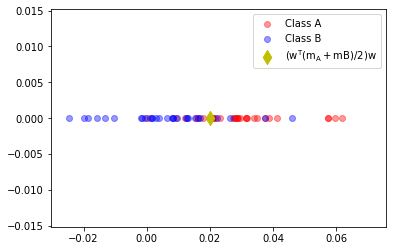

In [55]:
projA = (w @ sonarTestA.T, np.zeros(len(sonarTestA)))
projB = (w @ sonarTestB.T, np.zeros(len(sonarTestB)))

# plot projected data
for data, marker, color, label in zip((projA, projB), 
    ('o', 'o'), ('red', 'blue'), ('Class A', 'Class B')):

    plt.scatter(*data,
            marker=marker,
            color=color,
            alpha=0.4,
            label=label
            )

# plot decision boundary
w_c = ((w @ (mA + mB) / 2), 0)
plt.scatter(*w_c, s=100, c='y', marker='d', 
            label='$\mathrm{(w^T(m_A + mB)/2)w}$')

plt.legend()
plt.show()

### What about a different decision boundary than $c:= \mathrm{w^T(m_A + m_b)} / 2$

How sensitive is the success rate of classification to the particular choise of decision boundary $c$? We attempt five different decision boyndaries, evenly spaced in the interval $(\mathrm{w^T m_B}, \mathrm{w^T m_A})$.

First, observe that $\mathrm{w^T m_B} < \mathrm{w^T m_A}$.

In [56]:
assert w @ mB < w @ mA

In [57]:
for c in np.linspace( w @ mB, w @ mA, 5):
    
    #project data
    projA = w @ sonarTestA.T
    projB = w @ sonarTestB.T
    
    # determine labels
    test_labels_A = (projA > c) * 1
    test_labels_B = (projB > c) * 1
    
    # sum missclassifications
    misscls = np.sum(test_labels_A == 0) + np.sum(test_labels_B == 1)


    # calculate success rate
    success_rate = 1 - (misscls / (len(test_labels_A) + len(test_labels_B)))
    
    print('Success rate for c={:.2}: {:.2}'.format(c,success_rate))

Success rate for c=0.0088: 0.81
Success rate for c=0.014: 0.84
Success rate for c=0.02: 0.82
Success rate for c=0.026: 0.73
Success rate for c=0.031: 0.63


The optimal solution seems still to be the midpoint $\mathrm{m^T (m_A + m_B)} /2 $.

### Possible issue with singular $\mathrm{S_W}$
The determinant of the *within-covariance matrix* $\mathrm{S_W}$ is very close to zero:

In [61]:
print('Determinant(Sw) = {:.3}'.format(np.linalg.det(S_W)))

Determinant(Sw) = 1.77e-151


This is so since all the values in the array of features is between zero and one (perhaps the data is normalized?), and thus the covariance matrices is populated with values in $[-1, 1]$ - in particular manny values very close to zero (perhaps one could guess that with a large number of features quite a few of the will be uncorrelated). Thus the determinant becomes very small.

If $\mathrm{S_W}$ is singular one could use the generalized inverse instead.

### What if we project the data onto an higer dimension than one?

More generally we may project the features onto a space of lower dimension $D'$ by introducing a matrix

$$
\mathrm W = \begin{bmatrix}
\vdots & \vdots & \dots & \vdots \\
\mathrm{w_1} & \mathrm{w_2} & \dots & \mathrm{w_{D'}} \\
\vdots & \vdots & \dots & \vdots
\end{bmatrix}.
$$

and projectiong the data in $\mathrm{X}$ with

$$
\mathrm{W^T X}.
$$

The goal is now to maximize
$$
J(\mathrm W) := \left | \frac{\mathrm{W S_B W^T}}{\mathrm{W S_W W^T}} \right |,
$$

where $\mathrm{S_B}$ is the *between-scatter matrix*

$$
\mathrm{S_B} := N_A(\mathrm{m_A - m})(\mathrm{m_A - m})^T +N_B(\mathrm{m_B - m})(\mathrm{m_B - m})^T,
$$

$\mathrm{m}$ denotes the overall mean of the data and $N_i$ the proportion of observations from class $i$.

The solution can be shown to be

$$
\mathrm{W} = \mathrm{S_W^{-1/2}U},
$$

where $\mathrm{U}$ conists of the $D'$ leading egenvectors of

$$
\mathrm{S_W^{-1/2} S_B S_W^{-1/2}}.
$$


Let us calculate these matrices and find the two eigenvectors corresponding to the two largest eigenvalues.

In [62]:
# calculate wights from S_B
N_A = len(sonarTrainA) / (len(sonarTrainA) + len(sonarTrainB))
N_B = 1 - N_A

m = np.mean(np.vstack((sonarTrainA, sonarTrainB)), axis=0)

# calculate S_B
S_B = N_A*(mA - m)[:, None] @ (mA - m)[:, None].T + \
      N_B*(mB - m)[:, None] @ (mB - m)[:, None].T  

# calculate inverse of square root
S = np.linalg.inv(sqrtm(S_W))

# get eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(S @ S_B)

In [63]:
eig_pairs = np.concatenate([eig_vals[:, None], eig_vecs.T], axis=1)

# make entries real
eig_pairs = eig_pairs.real

# create index to sort in decreasing order ofter first column
ind = np.argsort(np.abs(eig_pairs[:, 0]))[::-1]
eig_pairs = eig_pairs[ind]



In [64]:
print('Variance explained:\n')
eigv_sum = np.sum(np.abs(eig_pairs[:, 0].real))
for i, val in enumerate(eig_pairs[:, 0].real):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (np.abs(val)/eigv_sum)))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%
eigenvalue 20: 0.00%
eigenvalue 21: 0.00%
eigenvalue 22: 0.00%
eigenvalue 23: 0.00%
eigenvalue 24: 0.00%
eigenvalue 25: 0.00%
eigenvalue 26: 0.00%
eigenvalue 27: 0.00%
eigenvalue 28: 0.00%
eigenvalue 29: 0.00%
eigenvalue 30: 0.00%
eigenvalue 31: 0.00%
eigenvalue 32: 0.00%
eigenvalue 33: 0.00%
eigenvalue 34: 0.00%
eigenvalue 35: 0.00%
eigenvalue 36: 0.00%
eigenvalue 37: 0.00%
eigenvalue 38: 0.00%
eigenvalue 39: 0.00%
eigenvalue 40: 0.00%
eigenvalue 41: 0.00%
eigenvalue 42: 0.00%
eigenvalue 43: 0.00%
eigenvalue 44: 0.00%
eigenvalue 45: 0.00%
eigenvalue 46: 0.00%
eigenvalue 47: 0.00%

The reason for this is that the second eigenvalue has size approximately $2\cdot 10^{-17}$. That the first eigenvalue almost make of for $100 \%$ of the total size does not seem promizing if we wish to extract additional information from a second dimension.

In [180]:
print('size of second eigenvalue is: ')
np.abs(eig_pairs[1, 0])

size of second eigenvalue is: 


1.8038303913749192e-17

In [82]:
W = eig_pairs[:2, 1:].T
display(W)

array([[-0.07955584,  0.05054502],
       [-0.1360972 , -0.16812433],
       [ 0.17883   ,  0.17168965],
       [-0.21575339,  0.010341  ],
       [-0.1120512 , -0.14203779],
       [ 0.01436884,  0.01305026],
       [ 0.07633867,  0.14952782],
       [-0.05154774, -0.09892023],
       [-0.16274366,  0.06508483],
       [-0.087414  ,  0.09630523],
       [-0.22450394, -0.18538096],
       [-0.22177783,  0.02707331],
       [-0.0648646 , -0.19784171],
       [-0.03091624,  0.15956817],
       [ 0.05555638, -0.10013992],
       [ 0.08820656,  0.01340952],
       [ 0.12228938, -0.07617854],
       [-0.00784334,  0.02378967],
       [-0.0486569 , -0.03177719],
       [-0.0008431 , -0.03140635],
       [-0.10854969, -0.03881182],
       [-0.10738817,  0.04919391],
       [ 0.01785505,  0.0188861 ],
       [-0.11288141,  0.08376079],
       [ 0.11295056, -0.0765758 ],
       [-0.02146682,  0.09386569],
       [-0.02646332, -0.10704629],
       [-0.09606099,  0.10911457],
       [-0.06122098,

Now, let us plot the data projected to the plane $\mathbb R^2$ with the matrix $W$ whose columns consists of the first two eigenvalues of $\mathrm{S_W^{-1} S_B}$.

In [67]:
(W.T @ sonarTestA.T).shape


(2, 33)

In [181]:
# calculate diagonal to the line between the two means.
perpend = utils.generate_perpendicular(W.T @ mA, W.T @ mB)

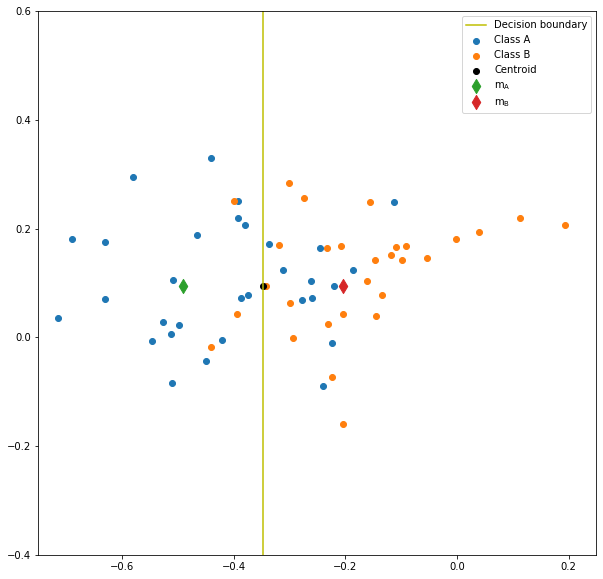

In [99]:
plt.figure(figsize=(10,10))
plt.scatter(*(W.T @ sonarTestA.T), label='Class A')
plt.scatter(*(W.T @ sonarTestB.T), label='Class B')
plt.scatter(*(W.T @ ((mA + mB) / 2) ), c='black', label='Centroid')
plt.scatter(*(W.T @ mA), label='$\mathrm{m_A}$', marker='d', s=100)
plt.scatter(*(W.T @ mB), label='$\mathrm{m_B}$', marker='d', s=100)
plt.plot(*perpend, label='Decision boundary', c='y')
plt.xlim(-0.75, 0.25)
plt.ylim(-0.4, 0.6)
plt.legend()
plt.show()

It remains to calculate the success rate and comparint the result to the success rate from projecting the data to one dimension. We use the centroid classifier which classefies each observations with the label of the nearest mean.

In [169]:
def centroid_classifier(data, means):
    '''
    Classifies observations with the label of the nearest
    mean.
    
    Parameters
    ----------
    data : numpy_array
        Array with individual observations in each row.
    
    means : numpy_array
        Array with the different means in each row.
        
    Returns
    -------
    labels : numpy_array
        Array with labels, 0, 1, 2 etc. The labels correspond
        to the ordering of the means in the means input.
    '''
    differences = data[:, None] - means
    
    distances = np.linalg.norm(differences, axis=2)
    
    return np.argmin(distances, axis=1)

In [178]:
projA = W.T @ sonarTestA.T
projB = W.T @ sonarTestB.T
means = np.array([W.T @ mA, W.T @ mB])

labelsA = centroid_classifier(projA.T, means)
labelsB = centroid_classifier(projB.T, means)

# sum of misslabeled data
missc = sum(labelsA == 1) + sum(labelsB == 0)

rate = 1 - missc / (len(projA.T) + len(projB.T))
print(rate)

0.7741935483870968


Thus the second attempt did not improve the classification.